# Multi Layer Perceptron (MLP)


# 1. Réseaux de neurones artificiels


Un Multi Layer Perceptron (MLP) est un réseau de neurones artificiels composé de plusieurs couches de perceptron, où chaque neurone d'une couche est connecté à tous les neurones de la couche suivante. Les couches intermédiaires entre la couche d'entrée et la couche de sortie sont appelées couches cachées.

Chaque neurone d'un MLP utilise une fonction d'activation non linéaire pour transformer la somme pondérée des signaux d'entrée en une sortie. Les poids et les biais de chaque neurone sont appris par rétropropagation (backpropagation) lors de l'entraînement du réseau à partir d'un ensemble de données d'entraînement.

<img src='https://raw.githubusercontent.com/ECE-Engineer/TensorFlow-Multilayer-Perceptron/master/MLP.png'>

Un réseau de neuronnes est  caractérisé par : 
- le nombre de couches qu'il contient, 
- le nombre de neurones par couche,
- la fonction d'activation utilisée par chaque neurone.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/TensorFlow_logo.svg/1200px-TensorFlow_logo.svg.png' width=200>

[TensorFlow](https://www.tensorflow.org/) est une bibliothèque open source de calcul numérique et de machine learning, développée par Google Brain Team. Elle permet de créer et d'entraîner des de deeplearning  pour diverses tâches telles que la classification, la reconnaissance d'image, la détection d'objet, la segmentation d'image, la génération de texte et bien plus encore. 

Les modèles de deeplearning sont créés en assemblant des couches de neurones et en ajustant les poids de ces neurones lors de l'entraînement pour améliorer les performances du modèle. TensorFlow est utilisé dans de nombreuses industries et domaines, tels que la reconnaissance vocale, la robotique, la vision par ordinateur, la biologie, la finance, etc.

In [ ]:
import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 3 neurones
        self.model.add(tf.keras.layers.Dense(6, input_dim=input_dim, activation='sigmoid'))

        # Deuxième couche cachée de 3 neurones
        self.model.add(tf.keras.layers.Dense(3, activation='softmax'))
        self.model.add(tf.keras.layers.Dense(6, activation='sigmoid'))

        # Couche de sortie de 2 neurones
        self.model.add(tf.keras.layers.Dense(output_dim, activation='softmax'))

    
model = MultiLayerPerceptron(12, 1).model


model.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 6)                 24        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


file_path = 'train.csv'


# Import du jeu de données
df = pd.read_csv(file_path)

X = df.drop(['ID', 'contact', 'month', 'day', 'y'], axis=1)
y = df['y']

# Encodage des variables catégorielles
le = LabelEncoder()
X['job'] = le.fit_transform(X['job'])
X['marital'] = le.fit_transform(X['marital'])
X['education'] = le.fit_transform(X['education'])
X['default'] = le.fit_transform(X['default'])
X['housing'] = le.fit_transform(X['housing'])
X['loan'] = le.fit_transform(X['loan'])
X['poutcome'] = le.fit_transform(X['poutcome'])

y = le.fit_transform(y)

# Normalisation des données
sc = StandardScaler()
X = sc.fit_transform(X)

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
history = model.fit(X_train, y_train,validation_data=(X_test, X_test), epochs=5, batch_size=10) 

Epoch 1/5
1030/1030 [==============================] - 5s 3ms/step - loss: 0.6884 - accuracy: 0.3116 - val_loss: 1.1984 - val_accuracy: 0.0000e+00
Epoch 2/5
1030/1030 [==============================] - 3s 3ms/step - loss: 0.6884 - accuracy: 0.3116 - val_loss: 1.1984 - val_accuracy: 0.0000e+00
Epoch 3/5
1030/1030 [==============================] - 3s 3ms/step - loss: 0.6884 - accuracy: 0.3116 - val_loss: 1.1984 - val_accuracy: 0.0000e+00
Epoch 4/5
1030/1030 [==============================] - 3s 3ms/step - loss: 0.6884 - accuracy: 0.3116 - val_loss: 1.1984 - val_accuracy: 0.0000e+00
Epoch 5/5
1030/1030 [==============================] - 6s 5ms/step - loss: 0.6884 - accuracy: 0.3116 - val_loss: 1.1984 - val_accuracy: 0.0000e+00


In [ ]:
#Séparation des données en données d'entrainement et de test
from sklearn.model_selection import train_test_split
import numpy as np

# Générer des données d'exemple
X = np.random.rand(100, 10)  # Matrice de 100 échantillons de 10 variables
y = np.random.randint(2, size=100)  # Vecteur de 100 étiquettes binaires

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher la taille des ensembles d'entraînement et de test
print("Taille de l'ensemble d'entraînement :", X_train.shape[0])
print("Taille de l'ensemble de test :", X_test.shape[0])

Taille de l'ensemble d'entraînement : 80
Taille de l'ensemble de test : 20


In [ ]:
# Entrainement du modèle
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=5, batch_size=10)

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
# Evaluation du modèle
model.evaluate(X_test, y_test, batch_size=10)

## 2. Fonction d'activation

Une fonction d'activation est une fonction mathématique appliquée à la sortie d'un neurone dans un réseau de neurones artificiels. Elle introduit de la non-linéarité dans les sorties des neurones et permet ainsi au réseau de neurones de modéliser des relations complexes entre les entrées et les sorties.

Il existe plusieurs types de fonctions d'activation, chacune avec ses propres avantages et inconvénients. Voici quelques exemples de fonctions d'activation couramment utilisées :

- [Fonction sigmoïde](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) : une fonction en forme de S qui comprime les valeurs d'entrée entre 0 et 1, souvent utilisée pour la classification binaire ou la régression logistique.
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/SigmoidFunction.svg/2560px-SigmoidFunction.svg.png' width=300>

- [Fonction tangente hyperbolique](https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh) (tanh) : une fonction similaire à la fonction sigmoïde, mais qui comprime les valeurs d'entrée entre -1 et 1.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Hyperbolic_Tangent.svg/langfr-2880px-Hyperbolic_Tangent.svg.png' width=400>

- [Fonction ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu) (Rectified Linear Unit) : une fonction qui renvoie la valeur d'entrée si elle est positive, sinon renvoie 0. Cette fonction est souvent utilisée pour les réseaux de neurones profonds en raison de sa simplicité et de son efficacité.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/2880px-Activation_rectified_linear.svg.png' width=400>

- [Fonction softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) : une fonction qui renvoie un vecteur de probabilités normalisées, souvent utilisée pour la classification multi-classes.

<img src='https://miro.medium.com/v2/resize:fit:480/1*5nKWsukS6lPR-7fHtlK2Rg.png'>

Le choix de la fonction d'activation dépend du type de problème de modélisation, du type de données en entrée et de la structure du réseau de neurones.

D'autres fonctions d'activation existent et peuvent être utilisées dans TensorFlow. Vous pouvez consulter la [documentation TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/activations) pour plus d'informations.

## 2. Fonction de coût et descente de gradient

<img src='https://i.stack.imgur.com/VIeBL.png' width=700>

### Fonction de coût
Une fonction de perte (ou fonction d'erreur) est une mesure utilisée pour évaluer la qualité des prédictions d'un modèle de machine learning. Elle calcule l'écart entre les sorties prédites par le modèle et les sorties attendues (étiquettes de classe) pour un ensemble de données d'entraînement. 

L'objectif de l'apprentissage automatique est de minimiser cette fonction de perte, c'est-à-dire de trouver les paramètres du modèle qui minimisent l'écart entre les prédictions et les étiquettes de classe réelles.

La fonction de perte est spécifique au type de tâche de classification ou de régression que le modèle tente de résoudre :


**=> Pour de la classification binaire on retrouve :**
- l'entropie croisée binaire, Elle mesure l'écart entre la probabilité prédite de la classe positive et la valeur réelle de la classe. loss = mean(- y_true * log(y_pred) - (1 - y_true) * log(1 - y_pred))

`loss='binary_crossentropy'`

- la fonction de perte logistique, qui est similaire à l'entropie croisée binaire, mais qui est plus stable pour les valeurs de probabilité proches de 0 ou 1.

`loss='log_loss'`

**=> Pour la classification multiclasse, on utilise souvent :**
- l'entropie croisée catégorielle, elle mesure la distance entre la distribution de probabilité de sortie du modèle et la distribution de probabilité des étiquettes réelles. loss = mean(- sum(y_true * log(y_pred)))

`loss='categorical_crossentropy'`

**=> Pour de la regression, on retrouve :**
- Erreur quadratique moyenne (Mean Squared Error), elle est calculée en prenant la moyenne des carrés des différences entre les valeurs de sortie prédites et les valeurs réelles. mean(mean((y_true - y_pred) ** 2))

`loss='mean_squared_error'`

- Erreur absolue moyenne (Mean Absolute Error), elle mesure la moyenne des écarts absolus entre les valeurs prédites et les valeurs réelles. loss = mean(mean(abs(y_true - y_pred)))

`loss='mean_absolute_error'`

En plus de la fonction de perte, il existe également des fonctions de régularisation qui aident à prévenir le surapprentissage en ajoutant des pénalités à la fonction de perte pour les paramètres du modèle qui sont trop grands.

D'autre fonction de pertes existent et peuvent être utilisées dans TensorFlow. Vous pouvez consulter la [documentation TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/losses) pour plus d'informations.

### Descente de gradient

<img src='https://upload.wikimedia.org/wikipedia/commons/6/68/Gradient_ascent_%28surface%29.png'>

La descente de gradient est un algorithme d'optimisation qui agit sur les poids et les biais (ou "biais de neuronnes") du réseau de neurones.

L'objectif de la descente de gradient est de minimiser la fonction de perte du modèle en ajustant les poids et les biais du réseau de neurones. 

Pour ce faire, elle calcule le gradient de la fonction de perte par rapport à chaque poids et biais du réseau de neurones et utilise ce gradient pour ajuster progressivement les valeurs des poids et des biais dans la direction de la pente descendante de la fonction de perte.

Voici les optimiseurs disponibles dans TensorFlow :
- `SGD` (Stochastic Gradient Descent) : l'algorithme de descente de gradient stochastique classique, qui met à jour les poids du modèle à chaque itération en fonction du gradient de la fonction de perte par rapport aux poids.

- `Adam` (Adaptive Moment Estimation) : un algorithme d'optimisation adaptatif qui utilise des estimations adaptatives des moments du premier et du second ordre pour mettre à jour les poids du modèle.

- `RMSprop` (Root Mean Square Propagation) : un algorithme d'optimisation qui utilise une moyenne mobile du carré des gradients pour normaliser les mises à jour des poids.

- `Adagrad` (Adaptive Gradient Algorithm) : un algorithme d'optimisation qui adapte les taux d'apprentissage de chaque poids du modèle en fonction de l'historique des mises à jour.

- `Adamax` (Adaptive Moment Estimation with infinity norm) : une variante d'Adam qui utilise la norme infinie pour normaliser les mises à jour des poids.

- `Nadam` (Nesterov-accelerated Adaptive Moment Estimation) : une variante d'Adam qui incorpore la méthode Nesterov Accelerated Gradient pour accélérer la convergence.

----
### Exercice 1 : Entrainement d'un MLP sur le jeu de données `Bank marketing`

Créez un nouveau notebook intitulé `Modèle DeepLearning - Bank marketing` puis répondez aux questions suivantes. Chaque partie doit être séparée par un titre de niveau 2 et doit être accompagnée d'un commentaire expliquant votre démarche.

1. Complétez le code suivant en renseignant le chemin vers le jeu de données `Bank marketing` puis exécutez le code afin d'obtenir les variables d'entrainement et de test.

2. Créez un réseau de neuronnes profond avec 3 couches cachées de 10 neurones chacune et une couche de sortie de 1 neurone. Utilisez la fonction d'activation `relu` pour les couches cachées et `sigmoid` pour la couche de sortie. 

3. Compilez le modèle en utilisant l'optimiseur `adam` et la fonction de perte `binary_crossentropy`.

4. Entraînez le modèle en utilisant 10 epochs et une taille de batch de 32 et stockez l'historique de l'entraînement dans la variable `history`.   

Utilisez la méthode fit du modèle : `fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=5, batch_size=10, verbose=1)`

5. Affichez l'historique de l'entraînement en utilisant la fonction `plot_history`.

6. Obtenez les prédictions du modèle sur les données de test avec la méthode `predict` et calculez l'accuracy du modèle avec la fonction `accuracy_score` de la librairie `sklearn.metrics`. Utilisez une liste compréhension pour convertir les prédictions en 0 ou 1 avec un seuil de 0.5.

7. Affichez les poids du modèle avec l'attribut `get_weights` du modèle. Comment est-ce que les poids sont stockés ?

8. Changez les hyperparamètres du modèle et observez l'impact sur l'accuracy du modèle.
- fonction d'activation, 
- nombre de couches, 
- nombre de neurones, 
- optimiseur, 
- fonction de perte, 
- nombre d'epochs, 
- taille de batch

Au moins 3 configurations différentes doivent être testées.
Quel est le meilleur modèle que vous avez obtenu ? 

9. Sauvegardez le modèle en utilisant la méthode `save` du modèle. Chargez le modèle en utilisant la méthode `load_model` de la librairie `tensorflow.keras.models`.

10. Publiez votre projet sur GitHub et placez le lien dans dans le fichier [suivant](https://docs.google.com/spreadsheets/d/1mnS5XL4pJNmQNclndP2LZPCELOi1OmBKoW3803xyK8c/edit?usp=sharing).

**Bonus :** Déposez le `Tp 6 : Introduction au Deep Learning` dans votre dossier Github avec vos noms et prénoms dans le nom du fichier.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


file_path = 'train.csv'


# Import du jeu de données
df = pd.read_csv('train.csv')

X = df.drop(['ID', 'contact', 'month', 'day', 'y'], axis=1)
y = df['y']

# Encodage des variables catégorielles
le = LabelEncoder()
X['job'] = le.fit_transform(X['job'])
X['marital'] = le.fit_transform(X['marital'])
X['education'] = le.fit_transform(X['education'])
X['default'] = le.fit_transform(X['default'])
X['housing'] = le.fit_transform(X['housing'])
X['loan'] = le.fit_transform(X['loan'])
X['poutcome'] = le.fit_transform(X['poutcome'])

y = le.fit_transform(y)

# Normalisation des données
sc = StandardScaler()
X = sc.fit_transform(X)

# Séparer les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

array([[-0.09651752,  1.4095278 , -1.92250352, ..., -0.44574006,
        -0.33614417,  0.48099775],
       [-0.62725046, -1.04892593, -0.30533879, ...,  0.82765312,
         0.15175201, -1.53707595],
       [ 1.40722581,  0.18030093, -0.30533879, ..., -0.44574006,
        -0.33614417,  0.48099775],
       ...,
       [-1.06952791, -1.04892593, -0.30533879, ..., -0.44574006,
        -0.33614417,  0.48099775],
       [ 0.87649287,  1.4095278 , -0.30533879, ..., -0.44574006,
        -0.33614417,  0.48099775],
       [-1.33489437,  0.48760765,  1.31182593, ..., -0.44574006,
        -0.33614417,  0.48099775]])

In [ ]:
#question 2
import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(6, input_dim=input_dim, activation='relu'))

        # Deuxième couche cachée de 10 neurones
        self.model.add(tf.keras.layers.Dense(3, activation='relu'))
        #Troisième couche cahée de 10 neurones
        self.model.add(tf.keras.layers.Dense(6, activation='relu'))

        # Couche de sortie de 10 neurones
        self.model.add(tf.keras.layers.Dense(output_dim, activation='sigmoid'))

    
model_2 = MultiLayerPerceptron(12, 1).model


model_2.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 6)                 78        
                                                                 
 dense_37 (Dense)            (None, 3)                 21        
                                                                 
 dense_38 (Dense)            (None, 6)                 24        
                                                                 
 dense_39 (Dense)            (None, 1)                 7         
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# question 3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Création du modèle
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# question 4
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)



Epoch 1/10
322/322 [==============================] - 2s 3ms/step - loss: 0.5975 - accuracy: 0.6893 - val_loss: 0.5596 - val_accuracy: 0.7273
Epoch 2/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5594 - accuracy: 0.7302 - val_loss: 0.5463 - val_accuracy: 0.7401
Epoch 3/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5499 - accuracy: 0.7425 - val_loss: 0.5383 - val_accuracy: 0.7521
Epoch 4/10
322/322 [==============================] - 1s 4ms/step - loss: 0.5442 - accuracy: 0.7442 - val_loss: 0.5354 - val_accuracy: 0.7545
Epoch 5/10
322/322 [==============================] - 1s 4ms/step - loss: 0.5410 - accuracy: 0.7454 - val_loss: 0.5323 - val_accuracy: 0.7510
Epoch 6/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5397 - accuracy: 0.7480 - val_loss: 0.5292 - val_accuracy: 0.7591
Epoch 7/10
322/322 [==============================] - 1s 3ms/step - loss: 0.5380 - accuracy: 0.7492 - val_loss: 0.5300 - val_accuracy: 0.7599
Epoch 

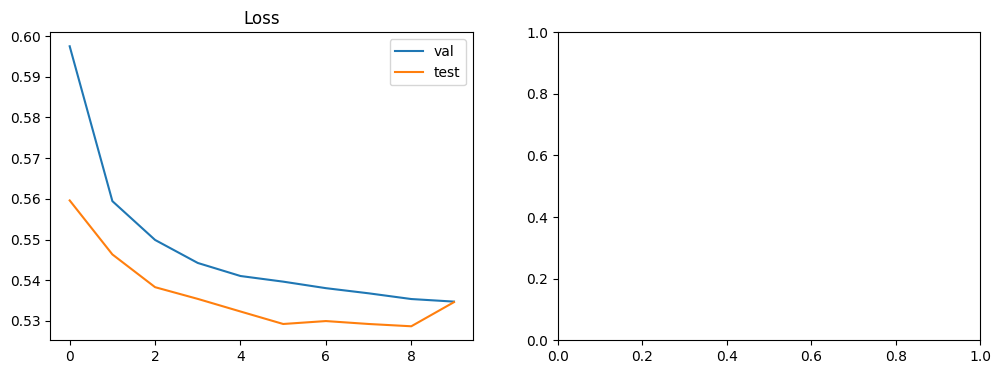

In [ ]:
# question 5
import matplotlib.pyplot as plt

plot_history(history)

In [ ]:
# question 6
import numpy as np
from sklearn.metrics import accuracy_score

# Obtenir les prédictions du modèle sur les données de test
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Convertir les prédictions en une liste de 0 ou 1
y_pred = [np.round(p[0]) for p in y_pred]

# Calculer l'accuracy du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

81/81 [==============================] - 0s 1ms/step
Accuracy: 0.7501942501942502


In [ ]:
# question 7
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Afficher les poids du modèle
weights = model.get_weights()
for i, w in enumerate(weights):
    print(f'Poids de la couche {i}: {w.shape}')

Poids de la couche 0: (4, 10)
Poids de la couche 1: (10,)
Poids de la couche 2: (10, 10)
Poids de la couche 3: (10,)
Poids de la couche 4: (10, 10)
Poids de la couche 5: (10,)
Poids de la couche 6: (10, 1)
Poids de la couche 7: (1,)


In [ ]:
#question 8
import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 15 neurones
        self.model.add(tf.keras.layers.Dense(6, input_dim=input_dim, activation='sigmoid'))

        # Deuxième couche cachée de 15 neurones
        self.model.add(tf.keras.layers.Dense(3, activation='softmax'))
        #Troisième couche cahée de 30 neurones
        self.model.add(tf.keras.layers.Dense(6, activation='sigmoid'))

        # Couche de sortie de 15neurones
        self.model.add(tf.keras.layers.Dense(output_dim, activation='softmax'))

    
model_2 = MultiLayerPerceptron(12, 1).model


model_2.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])
model_2.summary()

y_pred_2 = (model_2.predict(X_test) > 0.5).astype(int)
accuarcy = accuracy_score(y_test, y_pred_2)
print("Accuracy du model : {:.2%}".format(accuracy))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 6)                 78        
                                                                 
 dense_33 (Dense)            (None, 3)                 21        
                                                                 
 dense_34 (Dense)            (None, 6)                 24        
                                                                 
 dense_35 (Dense)            (None, 1)                 7         
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________
81/81 [==============================] - 0s 2ms/step
Accuracy du model : 75.02%


In [ ]:
#question 8
import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 25 neurones
        self.model.add(tf.keras.layers.Dense(6, input_dim=input_dim, activation='sigmoid'))

        # Deuxième couche cachée de 25 neurones
        self.model.add(tf.keras.layers.Dense(3, activation='softmax'))
        #Troisième couche cahée de 30 neurones
        self.model.add(tf.keras.layers.Dense(6, activation='sigmoid'))

        # Couche de sortie de 25 neurones
        self.model.add(tf.keras.layers.Dense(output_dim, activation='softmax'))

    
model_2 = MultiLayerPerceptron(12, 1).model


model_2.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])
model_2.summary()

y_pred_2 = (model_2.predict(X_test) > 0.5).astype(int)
accuarcy = accuracy_score(y_test, y_pred_2)
print("Accuracy du model : {:.2%}".format(accuracy))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 6)                 78        
                                                                 
 dense_21 (Dense)            (None, 3)                 21        
                                                                 
 dense_22 (Dense)            (None, 6)                 24        
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________
81/81 [==============================] - 1s 10ms/step
Accuracy du model : 75.02%


In [ ]:
#question 8
import tensorflow as tf

class MultiLayerPerceptron:
    def __init__(self, input_dim, output_dim):

        # On crée un modèle séquentiel
        self.model = tf.keras.models.Sequential() 

        # Première couche cachée de 30 neurones
        self.model.add(tf.keras.layers.Dense(6, input_dim=input_dim, activation='sigmoid'))

        # Deuxième couche cachée de 30 neurones
        self.model.add(tf.keras.layers.Dense(3, activation='softmax'))
        #Troisième couche cahée de 30 neurones
        self.model.add(tf.keras.layers.Dense(6, activation='sigmoid'))

        # Couche de sortie de 30 neurones
        self.model.add(tf.keras.layers.Dense(output_dim, activation='softmax'))

    
model_2 = MultiLayerPerceptron(12, 1).model


model_2.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['accuracy'])
model_2.summary()

y_pred_2 = (model_2.predict(X_test) > 0.5).astype(int)
accuarcy = accuracy_score(y_test, y_pred_2)
print("Accuracy du model : {:.2%}".format(accuracy))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 6)                 78        
                                                                 
 dense_29 (Dense)            (None, 3)                 21        
                                                                 
 dense_30 (Dense)            (None, 6)                 24        
                                                                 
 dense_31 (Dense)            (None, 1)                 7         
                                                                 
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________
81/81 [==============================] - 0s 2ms/step
Accuracy du model : 75.02%
